In [1]:
import numpy as np

In [20]:
class vanillaGrad(object):
    def __init__(self,weight_shape, learning_rate=0.1, C=0, loss_function="MSE"):
        self.weights = np.array(np.random.randn(weight_shape), ndmin=2)
        self.lr = learning_rate
        self.loss = loss_function
        self.history = {}
        self.C = C# parameter that controls the amount of regulaarization

    def update_w(self, X, y):
        """ The default loss function is the preferred Mean Squared error, the other alternative is the MAE"""
        dl_dw = 0
        
        
        N = len(X)
            #looping over all the training data
        for i in range(N):
            x = np.array(X[i], ndmin=2).T
            np.dot(self.weights, x)  

            if self.loss == "MSE":                            
                dl_dw += (-2 *x * (y[i] - np.dot(self.weights, x)))
                #te derivative of the regularization term wrt weight 
                dl_dw_reg = self.C * np.sum(self.weights)
                
            
            #to use absolute loss function in future 
            else:
                 print("Only MSE allowed for now")
                
        #update the weight matrix
        #dividing by N to average the loss
        self.weights -= 1/N * ((self.lr * dl_dw.T) + dl_dw_reg)

        return self.weights

    def average_loss(self, X, y):
            X = np.array(X, ndmin=2)
            total_error = 0.0
            N = len(X)
            for i in range(N):
                x = X[i].T
                if self.loss == "MSE":
                    total_error += (y[i] - np.dot(self.weights, x)) **2 
                #to use absolute loss funct in future
                else:
                     print("Only MSE allowed for now")
                
            return total_error / float(N)

        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
                #update the weights
                self.update_w(X, y)
                #calculate the loss for the epoch 
                self.history[epoch] = self.average_loss(X, y)

                print(f"Epoch {epoch} / {epochs}: loss {self.history[epoch]}")
    
    def test(self, X,y):
         #return the MSE
         MSE = self.average_loss(X, y)
         predicted = [np.dot(self.weights, x) for x in X]
         predicted = list(predicted)
         return predicted, MSE
              
              

In [45]:
#generating data 
X = np.random.rand(500, 1)
y = []
# y = 2x1 + 3x2
for x in X:
    y.append(2*x)

#split the dataset into train and test set 
X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]

In [63]:
#create instance of the model
network = vanillaGrad(1, 0.3, 1)

In [64]:
#train the model
network.train(X_train, y_train, epochs=200)
network.weights


Epoch 0 / 200: loss [0.31862082]
Epoch 1 / 200: loss [0.22980094]
Epoch 2 / 200: loss [0.16757269]
Epoch 3 / 200: loss [0.12371998]
Epoch 4 / 200: loss [0.09261396]
Epoch 5 / 200: loss [0.07038925]
Epoch 6 / 200: loss [0.05438419]
Epoch 7 / 200: loss [0.04276]
Epoch 8 / 200: loss [0.03424158]
Epoch 9 / 200: loss [0.02794084]
Epoch 10 / 200: loss [0.02323611]
Epoch 11 / 200: loss [0.01968971]
Epoch 12 / 200: loss [0.01699155]
Epoch 13 / 200: loss [0.01492033]
Epoch 14 / 200: loss [0.01331687]
Epoch 15 / 200: loss [0.01206575]
Epoch 16 / 200: loss [0.0110825]
Epoch 17 / 200: loss [0.01030473]
Epoch 18 / 200: loss [0.00968594]
Epoch 19 / 200: loss [0.00919111]
Epoch 20 / 200: loss [0.00879365]
Epoch 21 / 200: loss [0.00847318]
Epoch 22 / 200: loss [0.00821392]
Epoch 23 / 200: loss [0.00800361]
Epoch 24 / 200: loss [0.00783259]
Epoch 25 / 200: loss [0.00769324]
Epoch 26 / 200: loss [0.00757951]
Epoch 27 / 200: loss [0.00748656]
Epoch 28 / 200: loss [0.00741051]
Epoch 29 / 200: loss [0.0073

array([[1.83868144]])

In [65]:
import matplotlib.pyplot as plt 

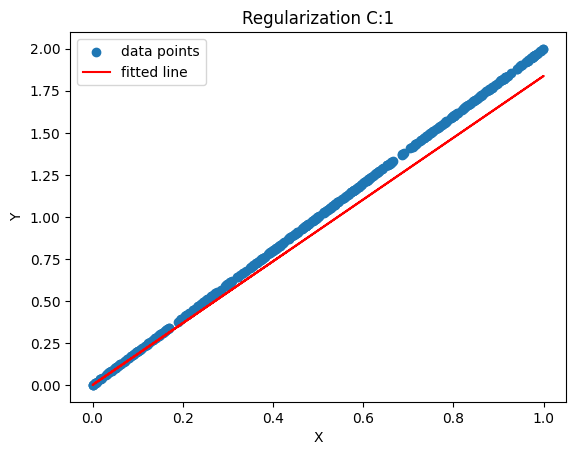

In [69]:
fitted_line, _ = network.test(X_test, y_test)
plt.scatter(X_test, y_test, label="data points")
plt.plot(X_test, fitted_line, color="red", label="fitted line")
plt.title(f"Regularization C:{network.C}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()